### Données de 18/02/2019 00:00 jusqu'à 18/02/2019 16:22

In [132]:
#Charger les biblio
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import string 
from subprocess import check_output
import seaborn as sns
from pylab import *
%matplotlib inline
sns.set()

In [133]:
# Lire la table avec 'header'
df = pd.read_csv('Hmvl2.csv', sep=';', engine='python')

In [134]:
# Remplacer les NaN par des zeros dans trame_hmvl
df.trame_hmvl.fillna('0', inplace=True)

In [135]:
#Identifier les donnees de chaque stations
groupe = df.groupby('code')
#Table de donnees de la station M7i
df = groupe.get_group('M7i')

In [136]:
# Reindexer la dataframe
df.index = range(len(df))

In [137]:
df.head(3)

,code,id,equipement_id,date_reception,trame_hmvl
0,M7i,6460,6460,2019-02-18 00:00:03.049,0
1,M7i,6460,6460,2019-02-18 00:00:15.049,14148093033
2,M7i,6460,6460,2019-02-18 00:00:21.049,0


Séparons d'abords la colonne 'trame_hmvl' par cases de 11 caractères.

In [138]:
#changeaons les noms de colonnes
df.columns = ['code', 'id','equipement_id', 'date','trame']

Déterminer le nombre maximale de caractère :

In [8]:
# On ajoute une colonne Count pour compter chacune
df['Count'] = df['trame'].str.len()

C:\Users\oumayma.doughmi\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df.Count.max()

154

In [10]:
# Supprimons la colonne
df = df.drop(['Count'], axis=1)

 154 est le nombre maximale de caractère, donc il faut créer 14 nouveaux champs qui contient les 11 caractères pour chaque véhicules.

réalisons une boucle qui séparer toutes les colonnes à la fois

In [139]:
liste = ["x0","x1","x2","x3","x4","x5","x6","x7","x8","x9",'x10','x11','x12', 'x13']

In [140]:
# Créer les tables 
for i in range(len(liste)):
    df[liste[i]] = df["trame"].str.slice(11*i,11*(i+1))

C:\Users\oumayma.doughmi\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df.head()

,code,id,equipement_id,date,trame,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,M7i,6460,6460,2019-02-18 00:00:03.049,0,0,,,,,,,,,,,,,
1,M7i,6460,6460,2019-02-18 00:00:15.049,14148093033,14148093033,,,,,,,,,,,,,
2,M7i,6460,6460,2019-02-18 00:00:21.049,0,0,,,,,,,,,,,,,
3,M7i,6460,6460,2019-02-18 00:00:26.549,05354096031,05354096031,,,,,,,,,,,,,
4,M7i,6460,6460,2019-02-18 00:00:33.049,0,0,,,,,,,,,,,,,


In [141]:
# Créer 14 tables vides
l = ['df0','df1','df2','df3','df4','df5','df6','df7','df8','df9','df10','df11','df12', 'df13']
for c in l:
     exec('{} = pd.DataFrame()'.format(c))

Dans le but d'avoir une ligne par véhicules, nous allons créer des tables $df_{i}$ en supprimant les $x_{j}$ avec $j \ne i$.

In [142]:
liste = ["x0","x1","x2","x3","x4","x5","x6","x7","x8","x9",'x10','x11','x12', 'x13']
liste2 = [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12, df13]

    # Séparer la colonne xi en 4 colonnes  
for i, f in zip(range( len(liste)), liste2):
    f = df[[liste[i], 'code', 'id', 'equipement_id', 'date']]

In [148]:
df0 = df.loc[:, df.columns != 'x0']

In [105]:
# Supprimer les colonnes xj
df0 = df.drop(['x3','x1','x2','x4','x5','x6','x7',
               'x8', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
# df1
df1 = df.drop(['x3','x0','x2','x4','x5','x6','x7',
               'x8', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
# Supprimer les colonnes xj
df2 = df.drop(['x3','x1','x0','x4','x5','x6','x7',
               'x8', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
df3 = df.drop(['x0','x1','x2','x4','x5','x6','x7',
               'x8', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
# Supprimer les colonnes xj
df4 = df.drop(['x0','x1','x2','x3','x5','x6','x7',
               'x8', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
# Supprimer les colonnes xj
df5 = df.drop(['x0','x1','x2','x4','x3','x6','x7',
               'x8', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
# Supprimer les colonnes xj
df6 = df.drop(['x0','x1','x2','x4','x5','x3','x7',
               'x8', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
# Supprimer les colonnes xj
df7 = df.drop(['x0','x1','x2','x4','x5','x6','x3',
               'x8', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
# Supprimer les colonnes xj
df8 = df.drop(['x0','x1','x2','x4','x5','x6','x3',
               'x7', 'x9', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)
df9 = df.drop(['x0','x1','x2','x4','x5','x6','x3',
               'x7', 'x8', 'x10', 'x11','x12', 'x13', 'trame'], axis=1)

df10 = df.drop(['x0','x1','x2','x4','x5','x6','x3',
               'x7', 'x9', 'x8', 'x11','x12', 'x13', 'trame'], axis=1)

df11 = df.drop(['x0','x1','x2','x4','x5','x6','x3',
               'x7', 'x9', 'x10', 'x8','x12', 'x13', 'trame'], axis=1)

df12 = df.drop(['x0','x1','x2','x4','x5','x6','x3',
               'x7', 'x8', 'x10', 'x11','x9', 'x13', 'trame'], axis=1)

df13 = df.drop(['x0','x1','x2','x4','x5','x6','x3',
               'x7', 'x9', 'x8', 'x11','x12', 'x10', 'trame'], axis=1)

In [106]:
liste = ["x0","x1","x2","x3","x4","x5","x6","x7","x8","x9",'x10','x11','x12', 'x13']
liste2 = [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12, df13]

    # Séparer la colonne xi en 4 colonnes  
for i, f in zip(range( len(liste)), liste2):
    f["voie"] = f[liste[i]].str.slice(0,1)
    f["horodatage"] = f[liste[i]].str.slice(1,5)
    f["vitesse"] = f[liste[i]].str.slice(5,8)
    f["longueur"] = f[liste[i]].str.slice(8,11)

In [107]:
df0.head()

,code,id,equipement_id,date,x0,voie,horodatage,vitesse,longueur
0,M7i,6460,6460,2019-02-18 00:00:03.049,0,0,,,
1,M7i,6460,6460,2019-02-18 00:00:15.049,14148093033,1,4148,093,033
2,M7i,6460,6460,2019-02-18 00:00:21.049,0,0,,,
3,M7i,6460,6460,2019-02-18 00:00:26.549,05354096031,0,5354,096,031
4,M7i,6460,6460,2019-02-18 00:00:33.049,0,0,,,


Afin de concatener les tables, il faut renommer les colonnes $x_{i}$ par x.

In [108]:
# rename columns
for i,f in zip(range( len(liste)), liste2):
    
    f.rename(columns={liste[i]:'x'}, inplace=True)

In [109]:
df5.head(1)

,code,id,equipement_id,date,x,voie,horodatage,vitesse,longueur
0,M7i,6460,6460,2019-02-18 00:00:03.049,,,,,


In [110]:
frames = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13]

result = pd.concat(frames)

In [111]:
# Reindexer la dataframe
result.index = range(len(result))

Il faut élilminer les lignes ou le x est vide ou vaut 0.

In [112]:
# lignes differentes de zero
df = result[result.x != '0']

In [113]:
df.head()

,code,id,equipement_id,date,x,voie,horodatage,vitesse,longueur
1,M7i,6460,6460,2019-02-18 00:00:15.049,14148093033,1,4148,093,033
3,M7i,6460,6460,2019-02-18 00:00:26.549,05354096031,0,5354,096,031
5,M7i,6460,6460,2019-02-18 00:00:38.549,10050094039,1,0050,094,039
7,M7i,6460,6460,2019-02-18 00:00:50.548,01469102037,0,1469,102,037
8,M7i,6460,6460,2019-02-18 00:00:56.549,11973117040,1,1973,117,040


In [114]:
# Convertir les colonnes a la fois de string à numerique
c = ['x', 'horodatage', 'vitesse', 'longueur']
for i in c:
    df[i] = pd.to_numeric(df[i] ,errors='coerce')

C:\Users\oumayma.doughmi\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [115]:
# Eliminer les lignes vides
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [116]:
#Exporter la table
df.to_csv('df_5sc.csv', index = False, encoding = 'utf-8')

 Voici le lien vers la table de données de de 18/02/2019 00:00 jusqu'à 18/02/2019 16:22 :
 
 https://github.com/Oumayma13/Data_5sc
 
 Sous le nom de 'df_5sc'.

# Rassembler les données:

In [117]:
# library datetime
from datetime import datetime
from pandas import datetime

In [118]:
# convertir le champs date to datetime
df['date'] = pd.to_datetime(df['date'])
# Définir la colonne DateTime comme index
df.index = df['date']
df.head(2)

,code,id,equipement_id,date,x,voie,horodatage,vitesse,longueur
date,,,,,,,,,
2019-02-18 00:00:15.049,M7i,6460,6460,2019-02-18 00:00:15.049,1.414809e+10,1,4148.0,93.0,33.0
2019-02-18 00:00:26.549,M7i,6460,6460,2019-02-18 00:00:26.549,5.354096e+09,0,5354.0,96.0,31.0


In [119]:
# rassembler par une minute.
df_1T = df.resample('1T').mean()

In [120]:
df_1T.head()

,id,equipement_id,x,horodatage,vitesse,longueur
date,,,,,,
2019-02-18 00:00:00,6460.0,6460.0,8.598900e+09,2598.800,100.400000,36.000000
2019-02-18 00:01:00,6460.0,6460.0,1.440199e+10,3151.875,113.625000,40.750000
2019-02-18 00:02:00,6460.0,6460.0,6.871854e+09,4371.750,104.250000,43.000000
2019-02-18 00:03:00,6460.0,6460.0,1.017536e+10,2675.250,105.125000,43.125000
2019-02-18 00:04:00,6460.0,6460.0,1.173395e+10,3400.500,113.166667,35.166667


In [121]:
# nombre de minutes
len(df_1T)

983

In [123]:
df_1T['date'] = df_1T.index 
# Reindexer la dataframe
df_1T.index = range(len(df_1T))

In [124]:
# rassembler par 6 minutes.
df_6T = df.resample('6T').mean()
df_6T.head()

,id,equipement_id,x,horodatage,vitesse,longueur
date,,,,,,
2019-02-18 00:00:00,6460.0,6460.0,1.153889e+10,3205.452381,107.000000,39.285714
2019-02-18 00:06:00,6460.0,6460.0,1.060299e+10,3745.742857,104.685714,41.142857
2019-02-18 00:12:00,6460.0,6460.0,9.723504e+09,2723.400000,104.366667,42.266667
2019-02-18 00:18:00,6460.0,6460.0,6.845782e+09,2754.772727,100.272727,39.363636
2019-02-18 00:24:00,6460.0,6460.0,7.811376e+09,3265.818182,102.954545,46.818182


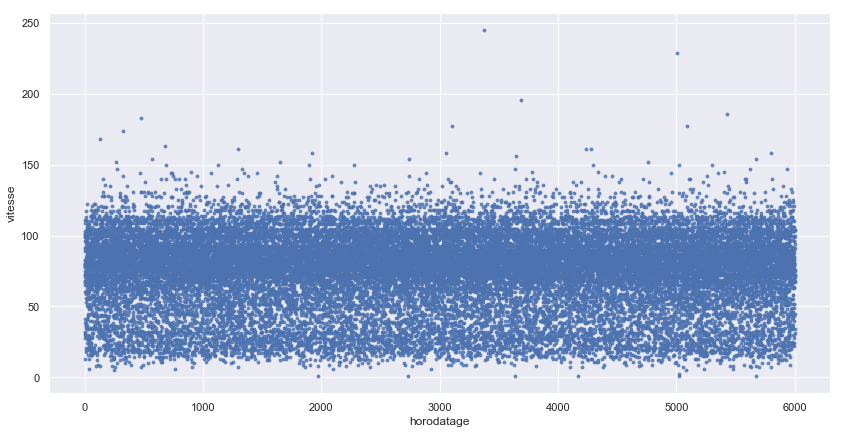